<a href="https://colab.research.google.com/github/yahafifi/telcom-project/blob/main/telcom_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI Maadi 65/telcom-project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.loc[753]

,753
customerID,3115-CZMZD
gender,Male
SeniorCitizen,0
Partner,No
Dependents,Yes
tenure,0
PhoneService,Yes
MultipleLines,No
InternetService,No
OnlineSecurity,No internet service


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isna().sum().sort_values(ascending=False)

,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [12]:
df.fillna(0, inplace=True)

In [13]:
df.isna().sum().sort_values(ascending=False)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df.loc[753]

,753
customerID,3115-CZMZD
gender,Male
SeniorCitizen,0
Partner,No
Dependents,Yes
tenure,0
PhoneService,Yes
MultipleLines,No
InternetService,No
OnlineSecurity,No internet service


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [20]:
df['PaymentMethod'].nunique()

4

In [21]:
df.corr(numeric_only=True, method='pearson')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


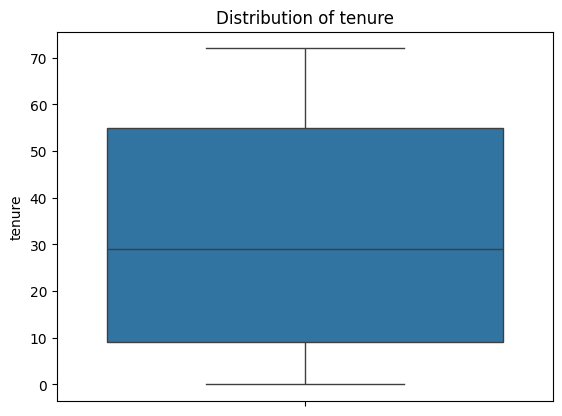

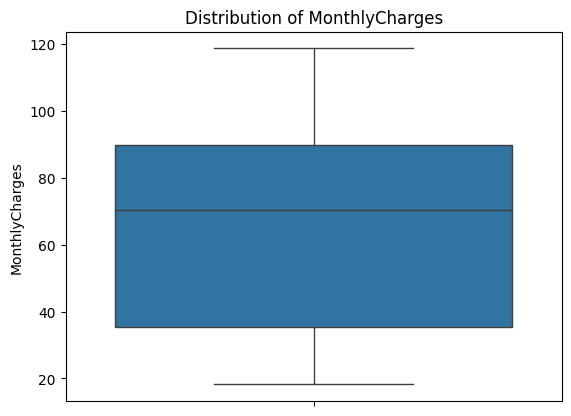

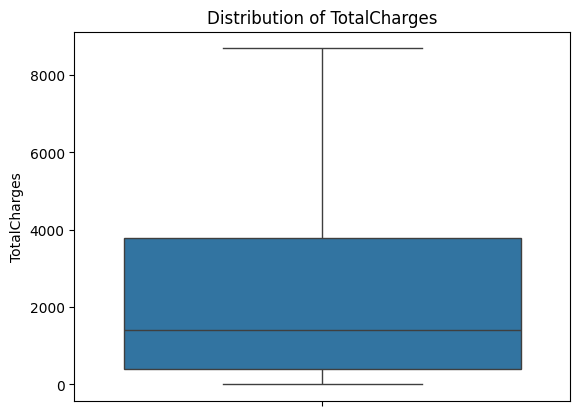

In [22]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in cols:
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

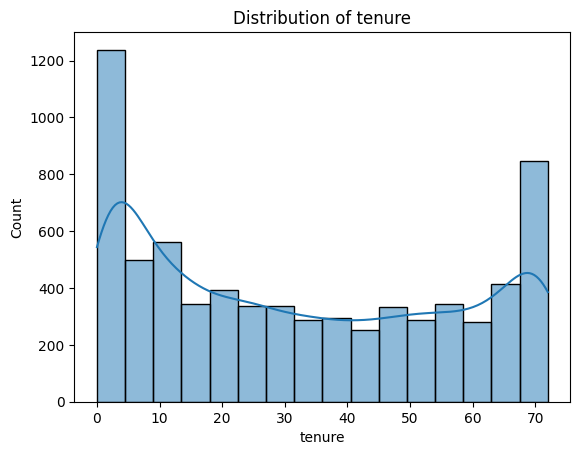

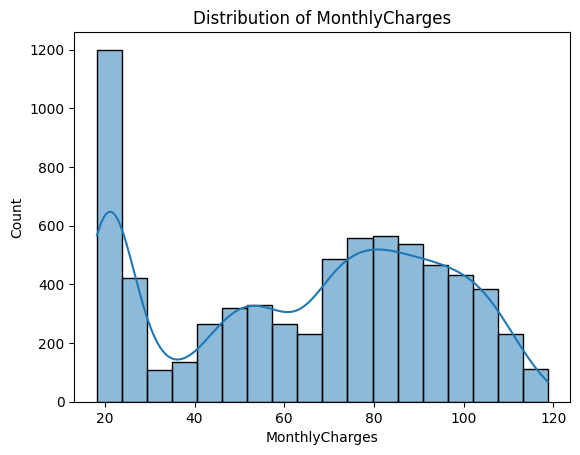

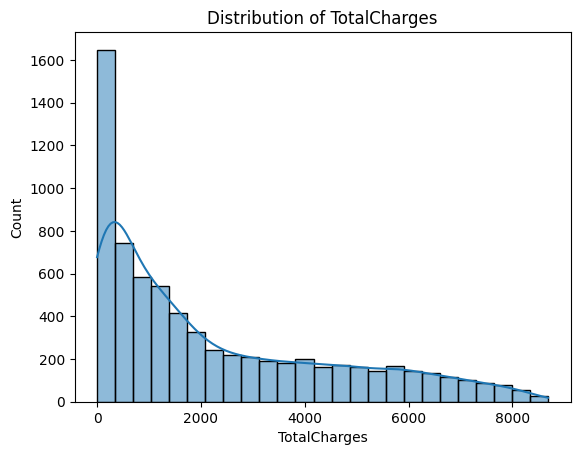

In [23]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in cols:
    plt.figure()
    sns.histplot(df[i], kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [24]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()



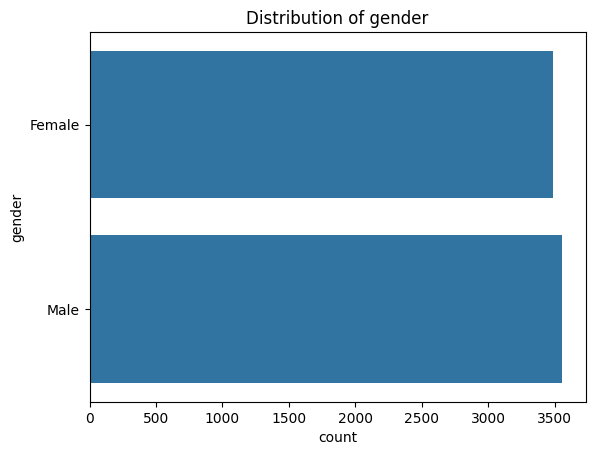

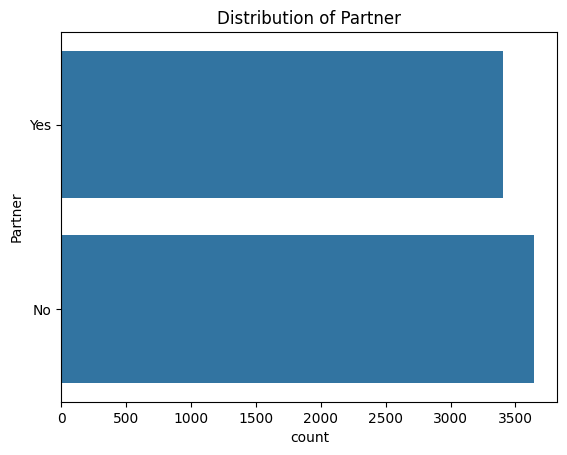

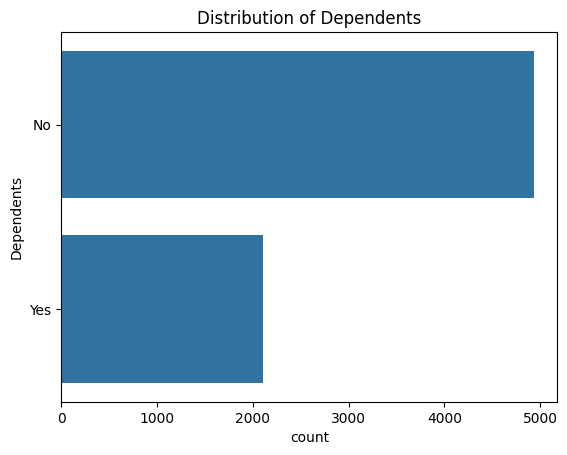

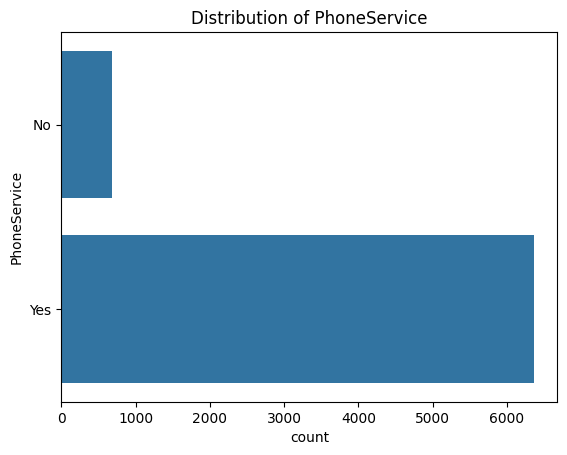

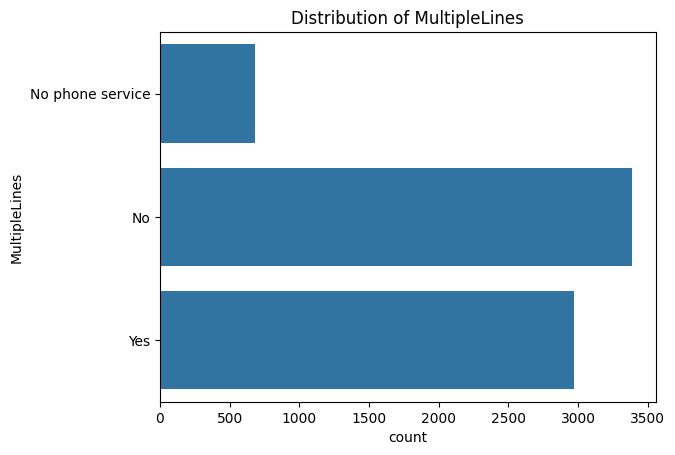

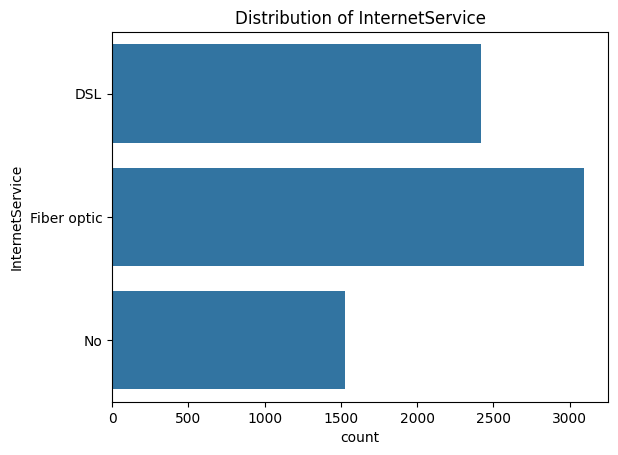

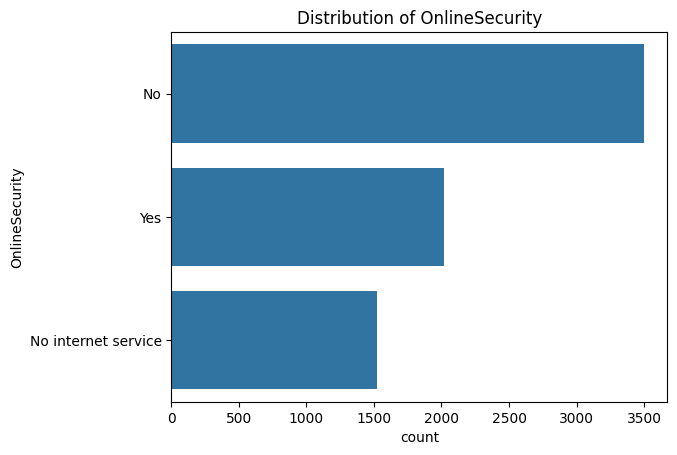

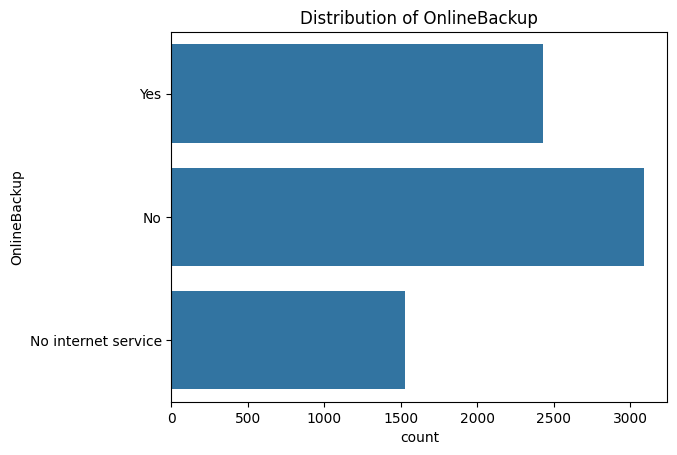

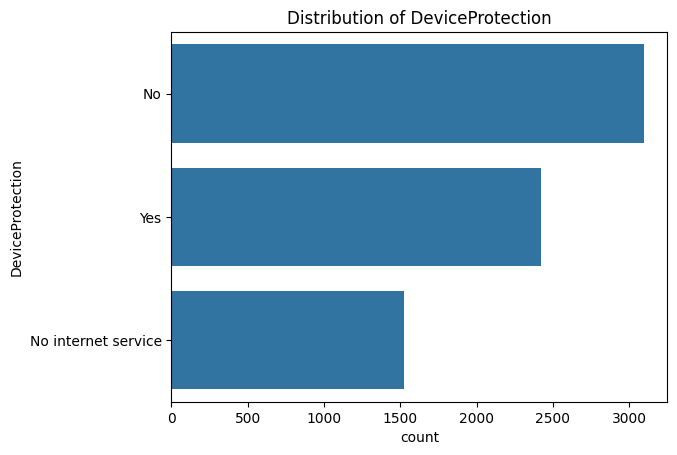

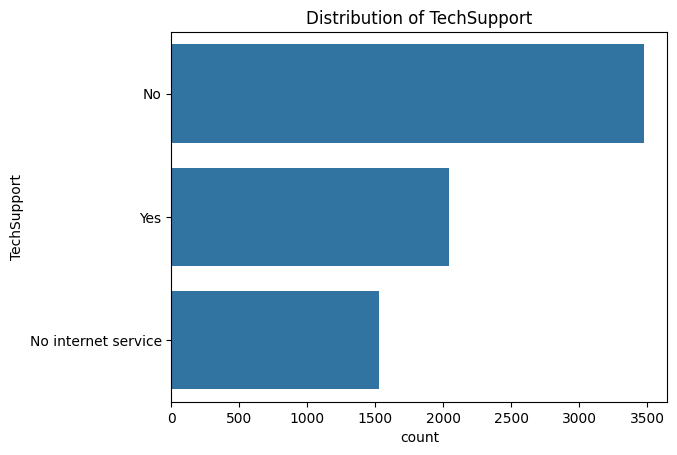

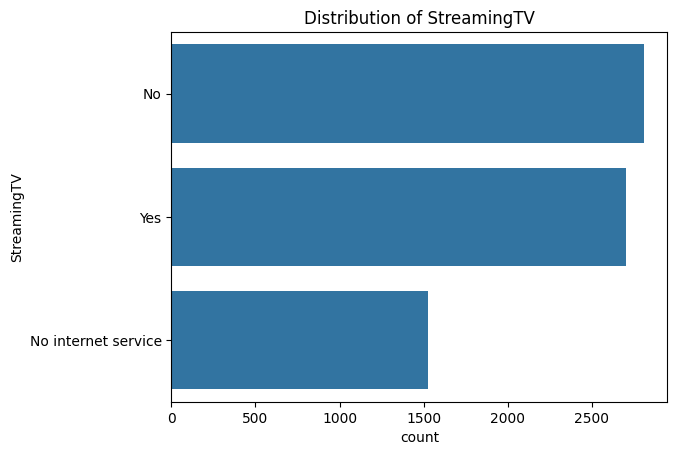

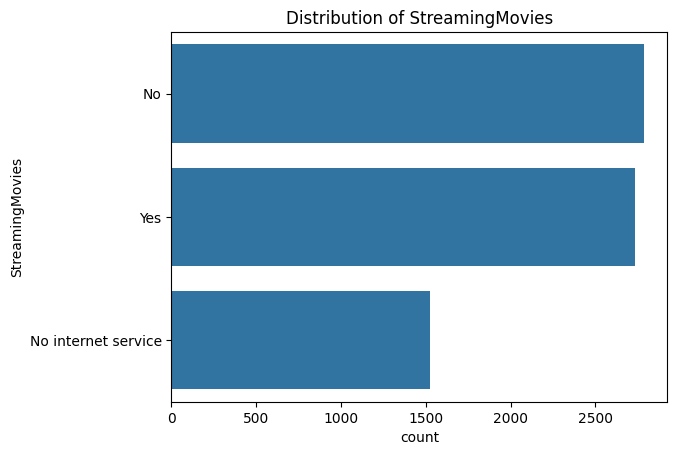

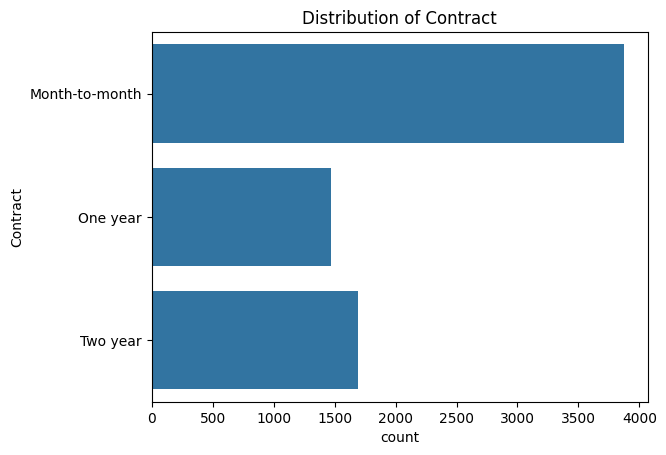

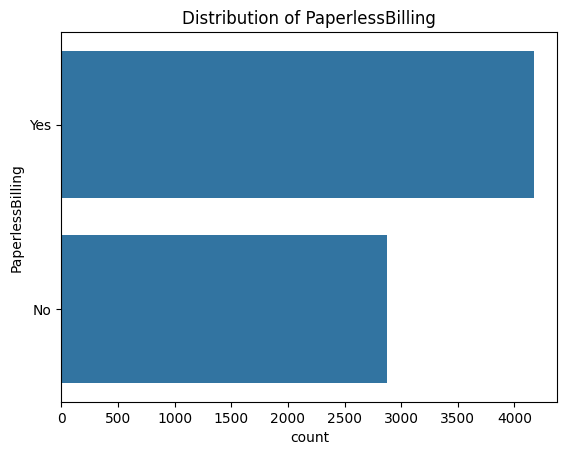

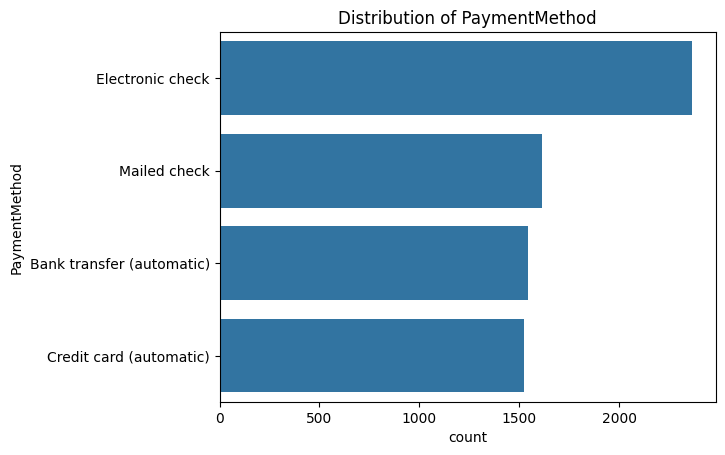

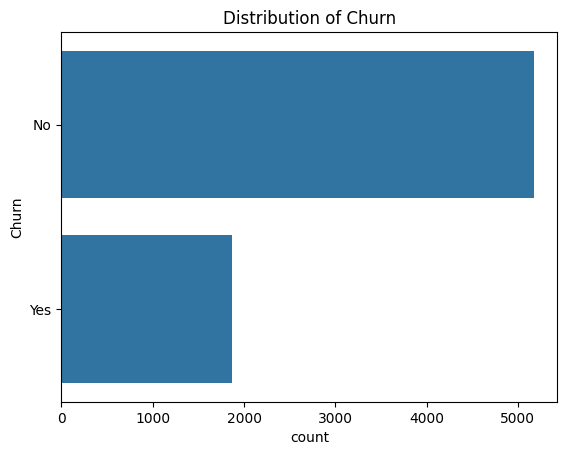

In [25]:
for i in cat_cols[1:]:
    plt.figure()
    sns.countplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

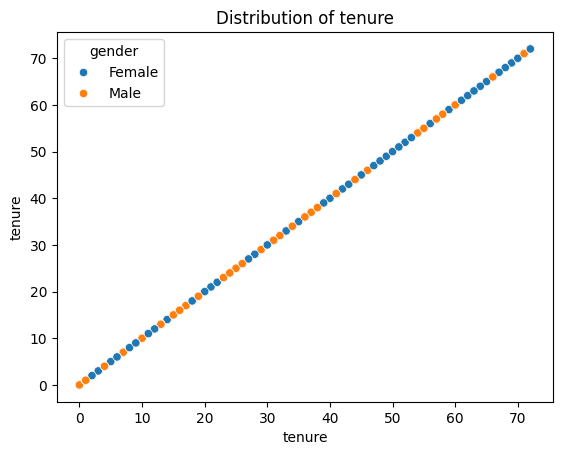

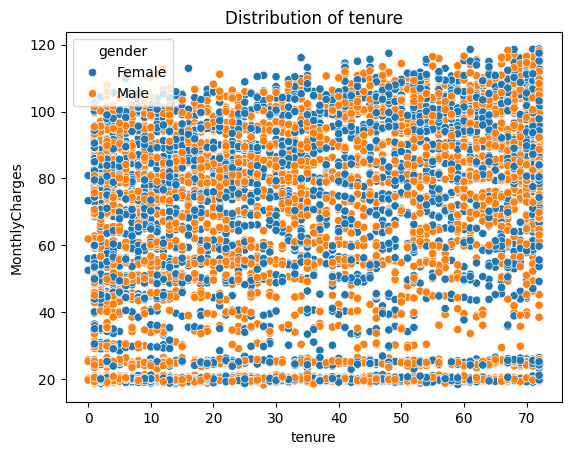

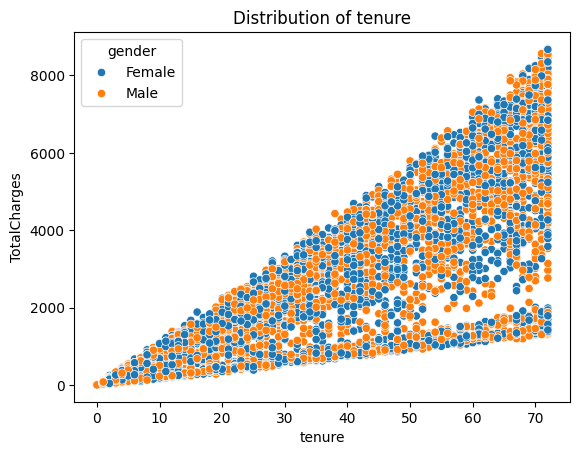

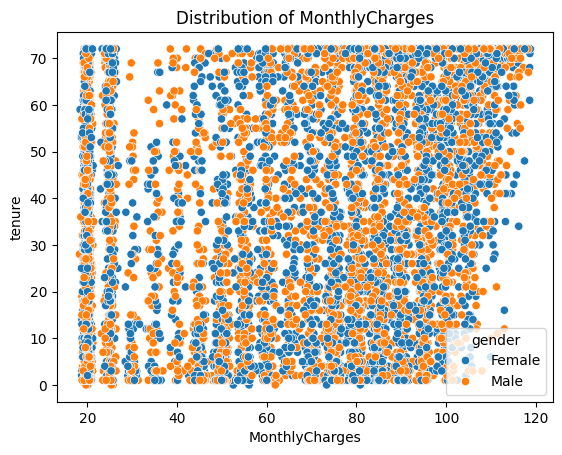

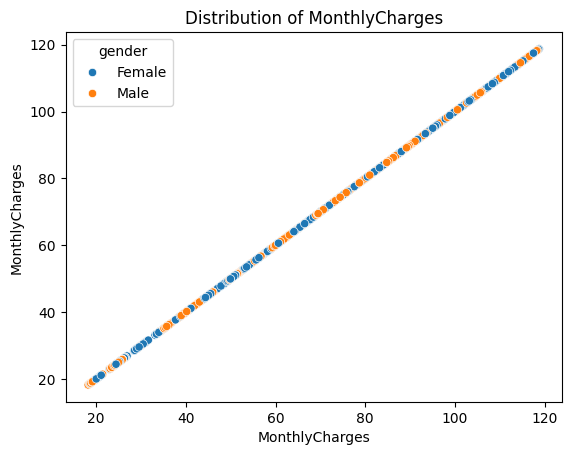

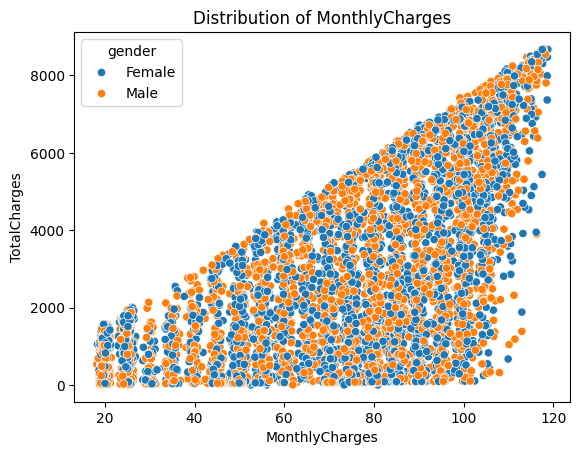

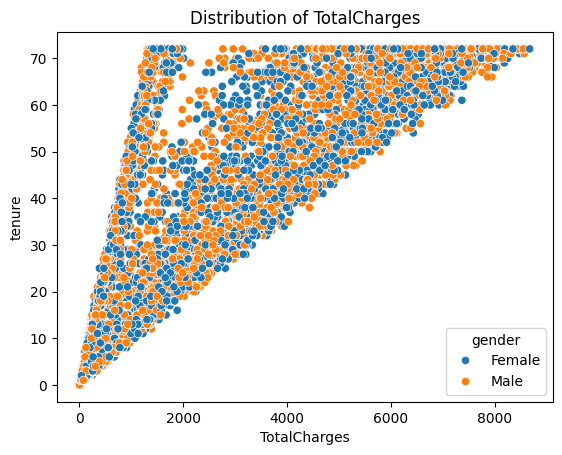

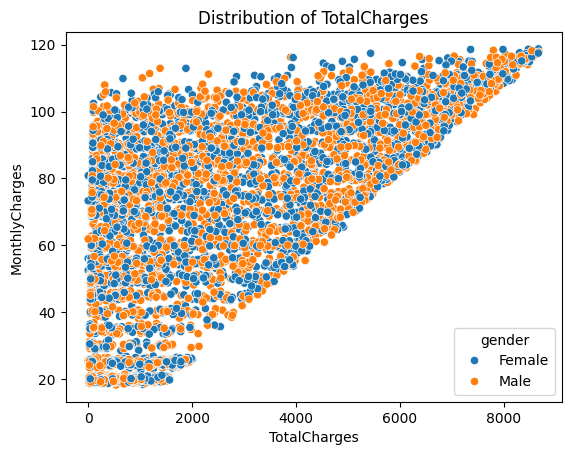

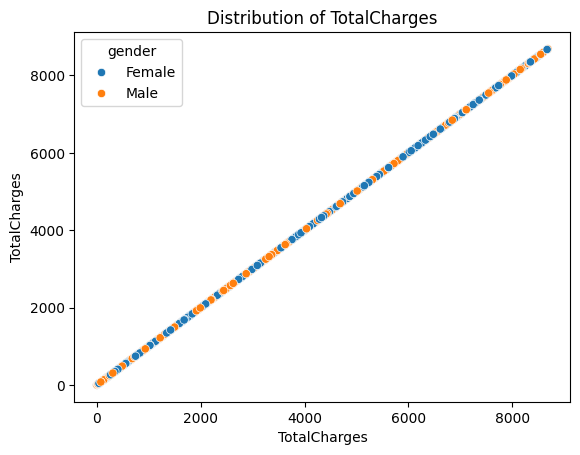

In [26]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in cols:
    for j in cols:
      plt.figure()
      sns.scatterplot(x=df[i], y=df[j], hue=df['gender'])
      plt.title(f"Distribution of {i}")
      plt.show()

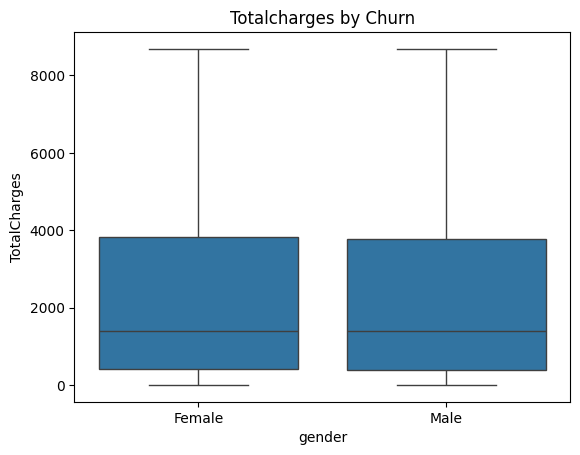

In [27]:
plt.figure()
sns.boxplot(data=df, x="gender", y="TotalCharges")
plt.title(f"Totalcharges by Churn")
plt.show()

In [28]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})
X = df.iloc[:, 1:-1]
y = df['Churn']

In [29]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [30]:
y = y.map({"No": 0, "Yes": 1})

In [31]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [32]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

print("XTraining set shape:", X_train.shape)
print("XTest set shape:", X_test.shape)
print("yTraining set shape:", y_train.shape)
print("yTest set shape:", y_test.shape)

XTraining set shape: (5634, 19)
XTest set shape: (1409, 19)
yTraining set shape: (5634,)
yTest set shape: (1409,)


In [33]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [34]:
# Preprocessing for numeric features: median imputation + standardization
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical features: most frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [35]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred_log = log_reg_pipeline.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

Logistic Regression - Accuracy: 0.8211497515968772

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [37]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest (baseline) - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest - baseline):")
print(classification_report(y_test, y_pred_rf))


Random Forest (baseline) - Accuracy: 0.7955997161107168

Classification Report (Random Forest - baseline):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



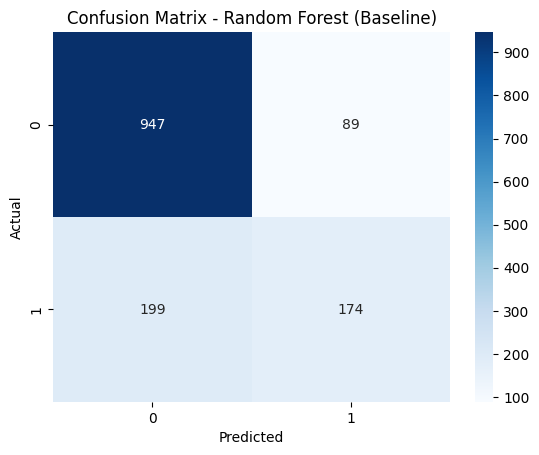

In [38]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Baseline)")
plt.show()


In [39]:

# Random Forest inside a pipeline (same preprocessor)
rf_pipeline_for_tuning = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Parameter grid for the RandomForestClassifier (kept small for workshop speed)
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    rf_pipeline_for_tuning,
    param_grid,
    cv=3,
    scoring="f1",  # focus on F1 for the positive class
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)


Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation F1 score: 0.5747946296857583


Tuned Random Forest - Accuracy: 0.8055358410220014

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



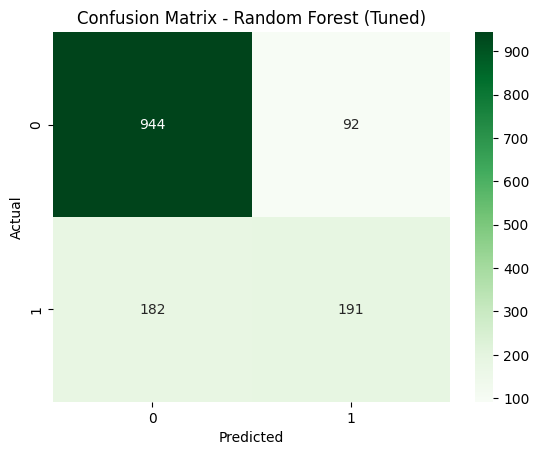

In [40]:

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest - Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best_rf))

cm_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()


In [42]:

model_filename = "/content/drive/MyDrive/AI Maadi 65/telcom-project/telco.joblib"
joblib.dump(log_reg_pipeline, model_filename)
print("Model saved to:", model_filename)


Model saved to: /content/drive/MyDrive/AI Maadi 65/telcom-project/telco.joblib


In [43]:

# Load the saved model
loaded_model = joblib.load(model_filename)

# Example new customer
example_customer = pd.DataFrame({
    "gender": ["Female"],
    "SeniorCitizen": ["No"],
    "Partner": ["Yes"],
    "Dependents": ["No"],
    "tenure": [5],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["Fiber optic"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["No"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["Yes"],
    "StreamingMovies": ["Yes"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [80.0],
    "TotalCharges": [400.0]
})

print("Example customer:")
display(example_customer)

# Predict churn probability and class
churn_pred = loaded_model.predict(example_customer)[0]

print("Predicted churn class (1 = will churn, 0 = will not churn):", churn_pred)


Example customer:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,80.0,400.0


Predicted churn class (1 = will churn, 0 = will not churn): 1
